
*Note:* You can run this from your computer (Jupyter or terminal), or use one of the
hosted options:

[![binder-logo](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fml-basic%252FREADME.ipynb%26branch%3Dmaster)

[![deepnote-logo](https://deepnote.com/buttons/launch-in-deepnote-small.svg)](https://deepnote.com/launch?template=deepnote&url=https://github.com/ploomber/projects/blob/master/ml-basic/README.ipynb)


# Basic ML project

This example shows how to build a Machine Learning pipeline using the Spec API.

## Setup (skip if using deepnote or binder)

(**Note**: Only required if you are running this example in your computer, not
required if using Binder/Deepnote)

~~~bash
# make sure you are in the ml-basic folder.
conda env create --file environment.yml
conda activate ml-basic
~~~

## Description

Let's take a look at the `pipeline.yaml file`:

In [1]:
%%sh
%%bash
cat pipeline.yaml

meta:
  extract_upstream: True
  extract_product: False

tasks:
    # tasks.get, features and join are python functions
  - source: tasks.get
    product: output/get.parquet

  - source: tasks.features
    product: output/features.parquet

  - source: tasks.join
    product: output/join.parquet

    # fit.py is a script executed as a notebook
  - source: fit.py
    name: fit
    product:
        nb: output/nb.ipynb
        model: output/model.pickle


sh: line 1: fg: no job control


Note that we changed one of the default settings: instead of
extracting the output directly from the source code, we'll declare it in
the `pipeline.yaml` file. Also observe that the first three tasks as Python
functions, while the last one is a script.

Generate the plot:

In [2]:
%%sh
%%bash
# Note: plotting doesn't work in deepnote
ploomber plot

Plot saved at: pipeline.png


sh: line 1: fg: no job control
100%|██████████| 4/4 [00:00<00:00, 5603.61it/s]


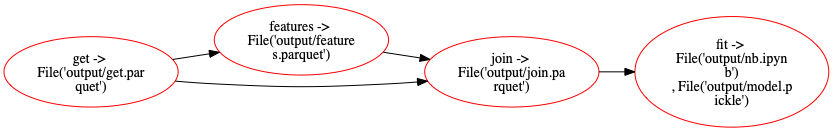

In [3]:
from IPython.display import Image
Image(filename='pipeline.png')

This pipeline gets some data, generates some features and trains a model.

## Executing the pipeline from the command line (shell)

In [4]:
%%sh
%%bash
ploomber build

name      Ran?      Elapsed (s)    Percentage
--------  ------  -------------  ------------
get       True         0.055636      1.50877
features  True         0.03197       0.866979
join      True         0.025762      0.698627
fit       True         3.57415      96.9256


sh: line 1: fg: no job control
Building task "fit": 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]


Since the training task is a script, it will generate a jupyter notebook,
[open it](output/nb.ipynb) to see the generated evaluation charts.

## Interacting with your pipeline from Python session

The shell command line interface is a convenient way to interact with your
pipeline. You can also load your pipeline in a Python session, which offers
more features than the shell version.

To load a pipeline from a `pipeline.yaml` file:

In [5]:
from ploomber.spec import DAGSpec
dag = DAGSpec('pipeline.yaml').to_dag()

# same as "ploomber status"
dag.status()

name,Last run,Outdated?,Product,Doc (short),Location
get,"13 seconds ago (Dec 30, 20 at 14:14)",False,File('output/get.parqu et'),Get data,/Users/Edu/dev/project s-ploomber/ml- basic/tasks.py:6
features,"10 seconds ago (Dec 30, 20 at 14:14)",False,File('output/features. parquet'),Generate new features from existing columns,/Users/Edu/dev/project s-ploomber/ml- basic/tasks.py:20
join,"6 seconds ago (Dec 30, 20 at 14:14)",False,File('output/join.parq uet'),Join raw data with generated features,/Users/Edu/dev/project s-ploomber/ml- basic/tasks.py:29
fit,"2 seconds ago (Dec 30, 20 at 14:14)",False,"MetaProduct({'nb': Fil e('output/nb.ipynb'), 'model': File('output/ model.pickle')})",Script trains a model,/Users/Edu/dev/project s-ploomber/ml- basic/fit.py


In [6]:
# same as "ploomber build"
dag.build()

name,Ran?,Elapsed (s),Percentage
get,False,0,0
features,False,0,0
join,False,0,0
fit,False,0,0


``DAG`` has a dict-like interface, to get a task:

In [7]:
dag['fit']

NotebookRunner: fit -> MetaProduct({'nb': File('output/nb.ipynb'), 'model': File('output/model.pickle')})

There are a lot of things you can do with from a Python session, see the
documentation for ``ploomber.DAG`` for details.

A shortcut to initialize a Python session from a terminal:

~~~bash
ploomber interact
~~~

## Where to go from here

* [`ml-intermediate/`](../ml-intermediate/README.ipynb) contains another ML
pipeline with more features. It shows how to parametrize a pipeline using
an `env.yaml` file (so you can run your pipeline with a small sample to test things quickly), run integration tests using `on_finish` and customizing output notebooks/reports.

In [8]:
# Parameters
product = "ml-basic/README.ipynb"
